In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [2]:
import pandas as pd
import os

import itertools 
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [3]:
import re

In [4]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import phik

In [5]:
path = "/masters_diploma/raw_data/open-meteo-50.44N30.48E188m.csv"

df = pd.read_csv(path, header=2)

In [6]:
df['time'] = df['time'].apply(lambda x: pd.to_datetime(pd.Timestamp(x).strftime('%Y-%m-%d %H:%M:%S')))
df = df.set_index('time')
df.index.name = 'date'
df

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),is_day (),sunshine_duration (s)
date,,,,,,,,,,,,,,
2015-01-01 00:00:00,-5.9,56,-13.3,0.0,0.0,0.07,71,1026.1,1001.8,100,17.5,261,0,0.0
2015-01-01 01:00:00,-5.5,59,-12.4,0.0,0.0,0.00,3,1025.1,1000.8,97,18.1,263,0,0.0
2015-01-01 02:00:00,-5.2,63,-11.2,0.0,0.0,0.00,3,1024.7,1000.5,100,17.0,265,0,0.0
2015-01-01 03:00:00,-4.9,68,-9.9,0.0,0.0,0.00,3,1024.3,1000.1,99,18.7,271,0,0.0
2015-01-01 04:00:00,-4.6,73,-8.7,0.0,0.0,0.07,71,1024.1,1000.0,98,16.6,270,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-18 19:00:00,13.7,75,9.3,0.0,0.0,0.00,0,1020.2,997.7,2,10.2,304,0,0.0
2025-09-18 20:00:00,13.1,77,9.2,0.0,0.0,0.00,0,1020.5,997.9,2,10.5,305,0,0.0
2025-09-18 21:00:00,12.7,79,9.1,0.0,0.0,0.00,0,1020.6,998.0,7,10.5,305,0,0.0


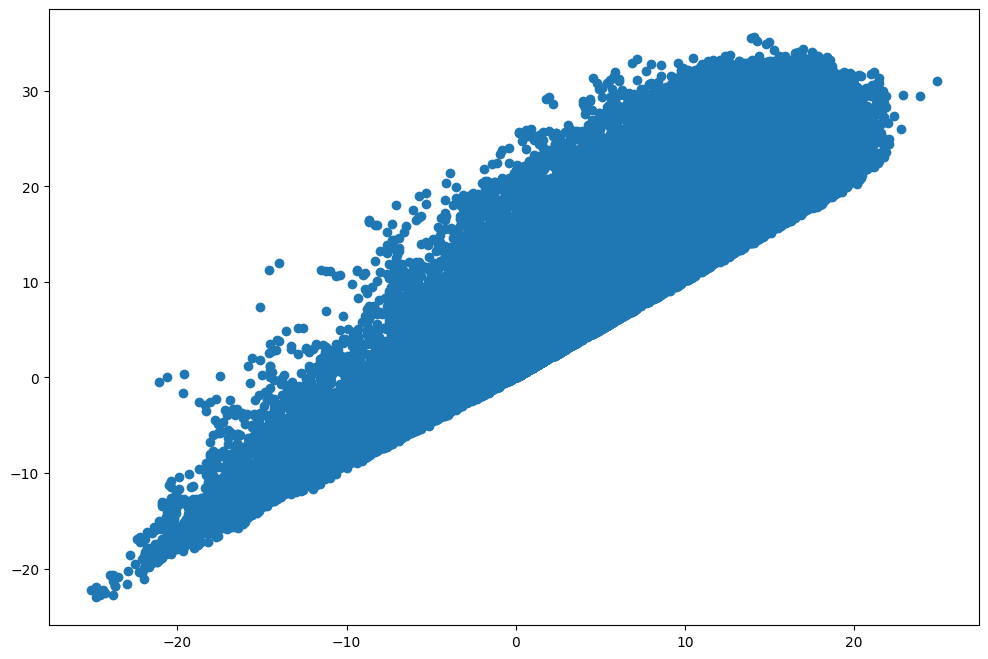

In [7]:
plt.scatter(x='dew_point_2m (°C)', y='temperature_2m (°C)', data=df)

In [8]:
# plt.plot(df['temperature_2m (°C)'])

In [9]:
new_index = pd.date_range(start=df.index[0], end=df.index[-1]+timedelta(days=7), freq='h')

df = df.reindex(new_index)

In [10]:
df.columns = [i.split(" (")[0] for i in df.columns]
df.columns = [re.split(r"_\d+", i)[0] if i.endswith('m') else i for i in df.columns]
df.columns

Index(['temperature', 'relative_humidity', 'dew_point', 'precipitation',
       'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'wind_speed', 'wind_direction', 'is_day',
       'sunshine_duration'],
      dtype='object')

In [11]:
df = df.sort_index()

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['week_day'] = df.index.day_of_week
df['year_day'] = df.index.day_of_year

In [12]:
feature = 'temperature'
window=7

close_agg = round(
    df.groupby(["week_day", "hour"], group_keys=False)[feature]
      .apply(lambda s: s.shift(1).rolling(window=window, min_periods=1).agg(["max","min","mean"]))
, 2)

close_agg.columns = [f'{feature}_max_{window}_days', f'{feature}_min_{window}_days', f'{feature}_mean_{window}_days']


close_agg

,temperature_max_7_days,temperature_min_7_days,temperature_mean_7_days
2015-01-01 00:00:00,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN
2015-01-01 02:00:00,NaN,NaN,NaN
2015-01-01 03:00:00,NaN,NaN,NaN
2015-01-01 04:00:00,NaN,NaN,NaN
...,...,...,...
2025-09-25 19:00:00,20.9,13.7,18.59
2025-09-25 20:00:00,19.8,13.1,17.91
2025-09-25 21:00:00,19.5,12.7,17.36
2025-09-25 22:00:00,19.3,12.2,16.80


In [13]:
for feature in ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'pressure_msl', 
                'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'sunshine_duration']:
    for window in [3, 5, 7]:

        close_agg = round(
            df.groupby("hour", group_keys=False)[feature]
              .apply(lambda s: s.shift(1).rolling(window=window, min_periods=1).agg(["max","min","mean"]))
        , 2)
        close_agg.columns = [f'{feature}_max_{window}_days', f'{feature}_min_{window}_days', f'{feature}_mean_{window}_days']
        
        df = df.join(close_agg)
     
    
    for window in [3, 5, 7]:

        close_agg = round(
            df.groupby(["week_day", "hour"], group_keys=False)[feature]
              .apply(lambda s: s.shift(1).rolling(window=window, min_periods=1).agg(["max","min","mean"]))
        , 2)

        close_agg.columns = [f'{feature}_max_{window}_weeks', f'{feature}_min_{window}_weeks', f'{feature}_mean_{window}_weeks']
        
        df = df.join(close_agg)
    
    
    for window in [3, 4]:

        close_agg = round(
            df.groupby(["month", "day", "hour"], group_keys=False)[feature]
              .apply(lambda s: s.shift(1).rolling(window=window, min_periods=1).agg(["max","min","mean"]))
        , 2)
        close_agg.columns = [f'{feature}_max_{window}_years', f'{feature}_min_{window}_years', f'{feature}_mean_{window}_years']
        
        df = df.join(close_agg)
        
        
    for h in [24, 48, 72, 168]:
        df[f'{feature}_lag_{h}'] = df[[f'{feature}']].shift(h)

In [14]:
df.fillna(0, inplace=True)
df.inplacendex.name = 'date'

In [15]:
df

,temperature,relative_humidity,dew_point,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,...,sunshine_duration_max_3_years,sunshine_duration_min_3_years,sunshine_duration_mean_3_years,sunshine_duration_max_4_years,sunshine_duration_min_4_years,sunshine_duration_mean_4_years,sunshine_duration_lag_24,sunshine_duration_lag_48,sunshine_duration_lag_72,sunshine_duration_lag_168
2015-01-01 00:00:00,-5.9,56.0,-13.3,0.0,0.0,0.07,71.0,1026.1,1001.8,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,-5.5,59.0,-12.4,0.0,0.0,0.00,3.0,1025.1,1000.8,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,-5.2,63.0,-11.2,0.0,0.0,0.00,3.0,1024.7,1000.5,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,-4.9,68.0,-9.9,0.0,0.0,0.00,3.0,1024.3,1000.1,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,-4.6,73.0,-8.7,0.0,0.0,0.07,71.0,1024.1,1000.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25 19:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 20:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 21:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 22:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.describe()

,temperature,relative_humidity,dew_point,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,...,sunshine_duration_max_3_years,sunshine_duration_min_3_years,sunshine_duration_mean_3_years,sunshine_duration_max_4_years,sunshine_duration_min_4_years,sunshine_duration_mean_4_years,sunshine_duration_lag_24,sunshine_duration_lag_48,sunshine_duration_lag_72,sunshine_duration_lag_168
count,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,...,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000,94104.000000
mean,9.722779,72.816639,4.458493,0.070339,0.058160,0.008692,10.381833,1014.635247,991.877246,64.477365,...,1336.345051,657.670898,1025.741159,1366.563999,582.821509,1028.069924,1124.251768,1124.251768,1124.251768,1124.251768
std,9.961165,18.429009,8.043030,0.325862,0.312358,0.063507,20.476396,43.751343,42.734265,39.822650,...,1693.769430,1329.351790,1415.225921,1702.312016,1261.930265,1402.089779,1613.352448,1613.352448,1613.352448,1613.352448
min,-23.000000,0.000000,-25.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000,60.000000,-1.200000,0.000000,0.000000,0.000000,1.000000,1010.900000,988.500000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.400000,76.000000,4.600000,0.000000,0.000000,0.000000,3.000000,1015.900000,993.400000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.900000,88.000000,11.000000,0.000000,0.000000,0.000000,3.000000,1021.700000,998.700000,100.000000,...,3600.000000,0.000000,2400.000000,3600.000000,0.000000,2400.000000,3600.000000,3600.000000,3600.000000,3600.000000
max,35.600000,100.000000,24.900000,15.000000,15.000000,3.640000,75.000000,1048.100000,1023.200000,100.000000,...,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000


In [17]:
df.to_csv('/masters_diploma/processed_data/history_weather.csv')

In [18]:
features = {'temperature': 'temp'
            , 'relative_humidity': 'humid'
            , 'precipitation': 'precip'
            , 'surface_pressure': 'pres'
            , 'cloud_cover': 'cloud'
            , 'wind_speed': 'wspeed'
            , 'wind_direction': 'wdir'
            }

In [19]:
for feature in features.keys():
    
    corr_table = df.corr()[feature]
    phik_corr_table = df.phik_matrix()[feature]

    new_df = pd.concat([corr_table, phik_corr_table], axis=1)
    new_df.columns = ['linear_corr_close', 'phik_corr_close']

    fig = make_subplots(rows=1, cols=1, 
                        subplot_titles=(f"Correlations with {feature.title()}"))

    fig.add_trace(go.Bar(
        y=new_df['linear_corr_close'],
        x=new_df.index,
        name='Linear Correlation',
        marker_color="red"
    ), row=1, col=1)

    fig.add_trace(go.Bar(
        y=new_df['phik_corr_close'],
        x=new_df.index,
        name='Phik Correlation',
        marker_color="blue"
    ), row=1, col=1)

    fig.update_layout(
        title=f'Correlations with {feature.title()}', 
        xaxis_tickangle=-45,
        width=1300,
        height=1000,
        hovermode="x"
    )

    fig.write_html(f'/masters_diploma/correlation_vizualizations/correlations_{feature}.html')

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

interval columns not set, guessing: ['temperature', 'relative_humidity', 'dew_point', 'precipitation', 'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'wind_speed', 'wind_direction', 'is_day', 'sunshine_duration', 'year', 'month', 'day', 'hour', 'week_day', 'year_day', 'temperature_max_3_days', 'temperature_min_3_days', 'temperature_mean_3_days', 'temperature_max_5_days', 'temperature_min_5_days', 'temperature_mean_5_days', 'temperature_max_7_days', 'temperature_min_7_days', 'temperature_mean_7_days', 'temperature_max_3_weeks', 'temperature_min_3_weeks', 'temperature_mean_3_weeks', 'temperature_max_5_weeks', 'temperature_min_5_weeks', 'temperature_mean_5_weeks', 'temperature_max_7_weeks', 'temperature_min_7_weeks', 'temperature_mean_7_weeks', 'temperature_max_3_years', 'temperature_min_3_years', 'temperature_mean_3_years', 'temperature_max_4_years', 'temperature_min_4_years', 'temperature_mean_4_years', 'temperature_lag_24', 'temperature_lag_48', 

In [20]:
# windows = [1, 2, 3]


# for feature, fname in features.items():
    
#     df[f'mean_{fname}'] = _[feature]
#     df.loc['2024-01-01':, f'mean_{fname}'] = None

#     for date in df.loc['2024-01-01':,].index:

#         date_range = []

#         for year in range(2020, date.year):

#             try:
#                 date_range += [pd.to_datetime(f"{year}-{date.month}-{date.day} {date.hour}:00")]

#             except ValueError:
#                 continue


#         date_range = [d for d in date_range if d in df.index]

#         if len(date_range) > 0:
#             df.loc[date, f'mean_{fname}'] = round(df.loc[date_range, feature].mean(), 2)

            
#     for window in windows:

#         df[f'new_mean_{fname}_{window * 2 + 1}_days'] = _[feature]
#         df.loc['2024-01-01':, f'new_mean_{fname}_{window * 2 + 1}_days'] = None

#         for date in df.loc['2024-01-01':,].index:

#             date_range = []

#             for year in range(2020, date.year):

#                 try:
#                     centre_date = pd.to_datetime(f"{year}-{date.month}-{date.day} {date.hour}:00")
#                     date_range += list(pd.date_range(centre_date-timedelta(days=window), 
#                                                      centre_date+timedelta(days=window), freq='D'))

#                 except ValueError:
#                     continue


#             date_range = [d for d in date_range if d in df.index]

#             if len(date_range) > 0:
#                 df.loc[date, f'new_mean_{fname}_{window * 2 + 1}_days'] = round(df.loc[date_range, feature].mean(), 2)
                

# df

In [21]:
# for feature, fname in features.items():
    
#     fig = make_subplots(rows=1, cols=1, 
#                     subplot_titles=(f"Means of {feature.title()}"))


#     fig.add_trace(go.Scatter(
#         y=df.loc['2024-01-01':, feature],
#         x=df.loc['2024-01-01':,:].index,
#         name=feature,
#         marker_color="black"
#     ), row=1, col=1)

#     fig.add_trace(go.Scatter(
#         y=df.loc['2024-01-01':, f'new_mean_{fname}_3_days'],
#         x=df.loc['2024-01-01':,:].index,
#         name=f'new_mean_{fname}_3_days',
#         marker_color="blue"
#     ), row=1, col=1)

#     fig.add_trace(go.Scatter(
#         y=df.loc['2024-01-01':, f'new_mean_{fname}_5_days'],
#         x=df.loc['2024-01-01':,:].index,
#         name=f'new_mean_{fname}_5_days',
#         marker_color="green"
#     ), row=1, col=1)

#     fig.add_trace(go.Scatter(
#         y=df.loc['2024-01-01':, f'new_mean_{fname}_7_days'],
#         x=df.loc['2024-01-01':,:].index,
#         name=f'new_mean_{fname}_7_days',
#         marker_color="magenta"
#     ), row=1, col=1)

#     fig.add_trace(go.Scatter(
#         y=df.loc['2024-01-01':, f'mean_{fname}'],
#         x=df.loc['2024-01-01':,:].index,
#         name=f'mean_{fname}',
#         marker_color="red"
#     ), row=1, col=1)

#     fig.update_layout(
#         title=f'Means of {feature.title()}', 
#         xaxis_tickangle=-45,
#         width=1300,
#         height=1000,
#         hovermode="x"
#     )

#     fig.write_html(f'/masters_diploma/correlation_vizualizations/visualization_mean_{fname}.html')

In [22]:
df

,temperature,relative_humidity,dew_point,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,...,sunshine_duration_max_3_years,sunshine_duration_min_3_years,sunshine_duration_mean_3_years,sunshine_duration_max_4_years,sunshine_duration_min_4_years,sunshine_duration_mean_4_years,sunshine_duration_lag_24,sunshine_duration_lag_48,sunshine_duration_lag_72,sunshine_duration_lag_168
2015-01-01 00:00:00,-5.9,56.0,-13.3,0.0,0.0,0.07,71.0,1026.1,1001.8,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,-5.5,59.0,-12.4,0.0,0.0,0.00,3.0,1025.1,1000.8,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,-5.2,63.0,-11.2,0.0,0.0,0.00,3.0,1024.7,1000.5,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,-4.9,68.0,-9.9,0.0,0.0,0.00,3.0,1024.3,1000.1,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,-4.6,73.0,-8.7,0.0,0.0,0.07,71.0,1024.1,1000.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25 19:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 20:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 21:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-09-25 22:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
list(df.columns)

['temperature',
 'relative_humidity',
 'dew_point',
 'precipitation',
 'rain',
 'snowfall',
 'weather_code',
 'pressure_msl',
 'surface_pressure',
 'cloud_cover',
 'wind_speed',
 'wind_direction',
 'is_day',
 'sunshine_duration',
 'year',
 'month',
 'day',
 'hour',
 'week_day',
 'year_day',
 'temperature_max_3_days',
 'temperature_min_3_days',
 'temperature_mean_3_days',
 'temperature_max_5_days',
 'temperature_min_5_days',
 'temperature_mean_5_days',
 'temperature_max_7_days',
 'temperature_min_7_days',
 'temperature_mean_7_days',
 'temperature_max_3_weeks',
 'temperature_min_3_weeks',
 'temperature_mean_3_weeks',
 'temperature_max_5_weeks',
 'temperature_min_5_weeks',
 'temperature_mean_5_weeks',
 'temperature_max_7_weeks',
 'temperature_min_7_weeks',
 'temperature_mean_7_weeks',
 'temperature_max_3_years',
 'temperature_min_3_years',
 'temperature_mean_3_years',
 'temperature_max_4_years',
 'temperature_min_4_years',
 'temperature_mean_4_years',
 'temperature_lag_24',
 'temperature_

In [24]:
# _1 = df.loc['2024-01-01':, ['temperature', 'new_mean_temp_3_days', 'new_mean_temp_5_days', 'new_mean_temp_7_days', 'mean_temp']]

# _2 = pd.DataFrame(None, index=_1.index)
# for col in _1.columns[1:]:
#     _2.loc[:, col] = abs(_1.loc[:, col] - _1.loc[:, 'temperature'])
    
# _3 = pd.DataFrame(index=_2.index, columns=_2.columns)
# for row in _2.index:
#     min_col = _2.loc[row, :].idxmin()  # Get the column with the minimum value
#     for col in _3.columns:
#         _3.loc[row, col] = 1 if col == min_col else 0  # Assign 1 if it's the min column, otherwise 0

# _3

In [25]:
# _3.sum()